## Statics maps in Geopandas

Use data provided in the data folder. Data folder contains the following layers
- grid.shp
- roads.shp
- metrso.shp

Read input files:

In [1]:
# import libraries
import geopandas as gpd
from pyproj import CRS
import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

# filepaths
grid_fp = r'data/TravelTimes_to_5975375_RailwayStation.shp'
roads_fp = r'data/roads.shp'
metro_fp = r'data/metro.shp'

# read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

<div class="alert alert-info">

**Task**

Check the coordinate reference system of the input files.
In case they are different, re-project the layers into a common one.

</div>

In [2]:
# check the crs of each layer
print('Roads crs: ', CRS(roads.crs).name)
print('Metro crs: ', CRS(metro.crs).name)
print('Grid crs', CRS(grid.crs).name)

Roads crs:  KKJ / Finland zone 2
Metro crs:  KKJ / Finland zone 2
Grid crs ETRS89 / TM35FIN(E,N)


Roads and metro are in old crs, while grid is in ETRS89 / TM35FIN(E,N).
Project roads and metro to the grid crs.

In [3]:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

In [4]:
# all the layers should be in the same coordinate system.
roads.crs == metro.crs == grid.crs

True

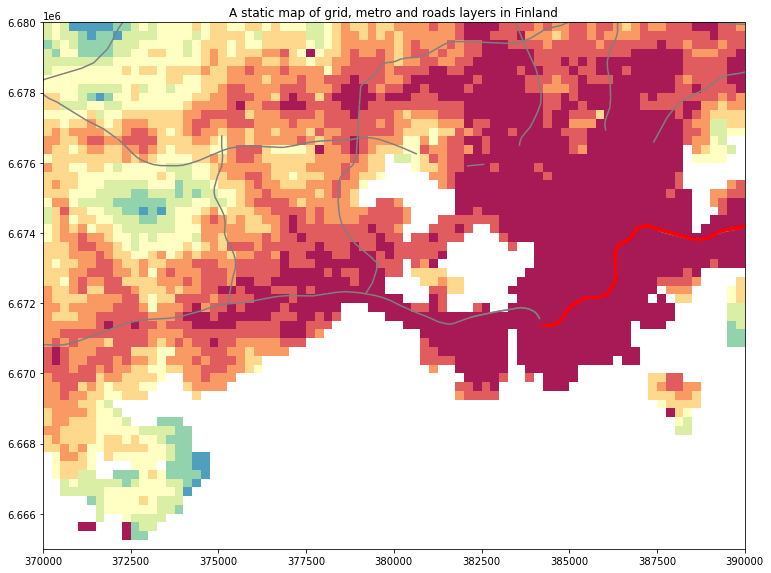

In [5]:
# To establish a better control of figures, use plt.subplots
fig, ax = plt.subplots(nrows=1, figsize=(12, 8))

# import grid layer
grid.plot(ax=ax, 
          column='pt_r_t', 
          linewidth=0.3, 
          cmap='Spectral',
          scheme='quantiles',
          k=9,
          alpha=0.9
         )

# import roads layer
roads.plot(ax=ax,
           color='grey',
           linewidth=1.5
          )

# import metro layer
metro.plot(ax=ax,
           color='red',
           linewidth=2.5
          )

# setting plot limits
ax.set_xlim(370000, 390000)
ax.set_ylim(6665000, 6680000)

# remove empty space around axes
plt.tight_layout()

# set title
plt.title('A static map of grid, metro and roads layers in Finland')

# save figure as png file to docs folder with a resolution of 300 dpi
outfp = 'docs/static_map.png'
plt.savefig(outfp, dpi=300);